# <font style="color:rgb(50,120,229)">Connected Component Analysis</font>
In this section, we will dip our toes into a simple computer vision algorithm called **Connected Component Analysis (CCA)**. It is a fancy name for labeling blobs in a binary image. So, it can also be used to count the number of blobs ( also called connected components ) in a binary image. Lets understand it by way of an example. 


In [1]:
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

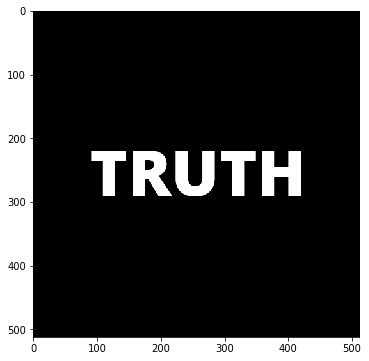

In [4]:
# Read image as grayscale
im = cv2.imread("data/images/truth.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(im)

In the figure above, we see a binary image with five blobs corresponding to the letters T, R, U, T and H. Connected Component Analysis (CCA) allows us to apply a label to every blob. In other words, CCA will create a mask where all pixels corresponding to the background are 0, all pixels corresponding to the first blob, (i.e. the letter T) are 1, those corresponding to R are 2 and so on and so forth. 

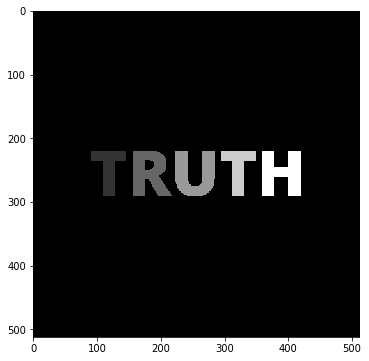

In [5]:
# Threshold Image
th, imThresh = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)

# Find connected components
_, imLabels = cv2.connectedComponents(imThresh)
plt.imshow(imLabels)

## <font style="color:rgb(50,120,229)">Display each label </font>

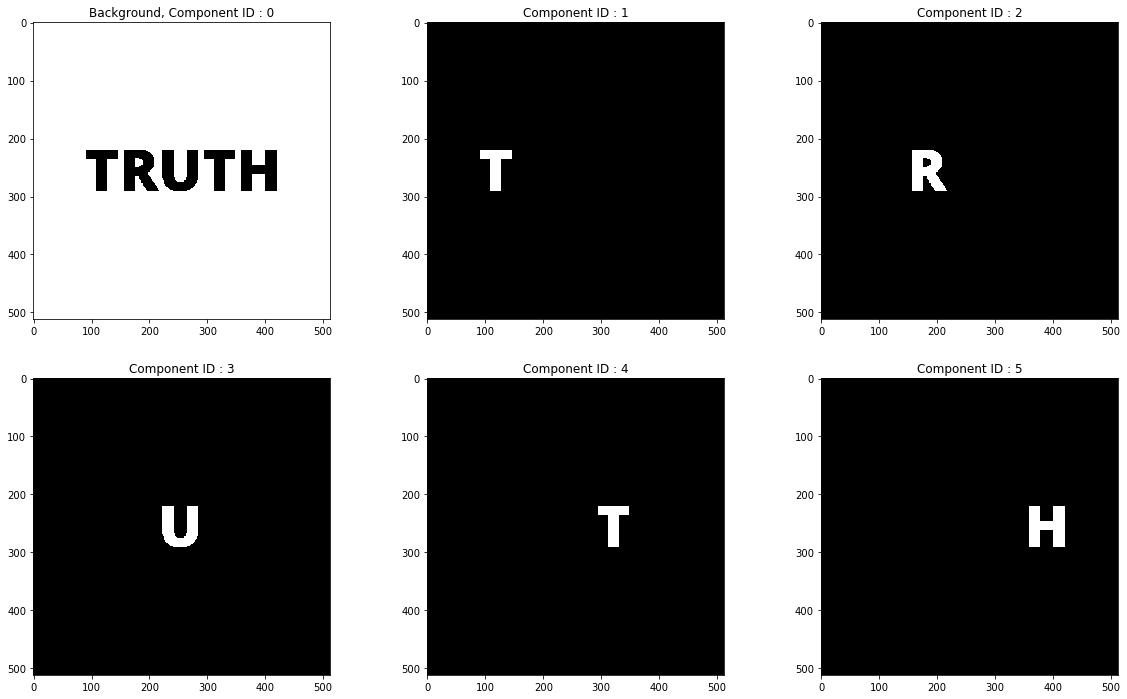

In [4]:
# Display the labels
nComponents = imLabels.max()

displayRows = np.ceil(nComponents/3.0)
plt.figure(figsize=[20,12])
for i in range(nComponents+1):
    plt.subplot(displayRows,3,i+1)
    plt.imshow(imLabels==i)
    if i == 0:
        plt.title("Background, Component ID : {}".format(i))
    else:
        plt.title("Component ID : {}".format(i))

# <font style="color:rgb(50,120,229)">Color Coding of Components</font>
Since it is a bit difficult to visualize the difference in intensity value in grayscale images, we apply a colormap so that grayscale values are converted to color for the purpose of display.

First, we normalize the image pixel values to 0 to 255. To achieve this we first find the min and max values in the image, and then normalize the image by subtracting the min and dividing by (max - min). This normalizes the image to be between 0 and 1. Finally 255 is multiplied to we get an image with values between 0 and 255. Finally, we apply a colormap on the labelled image

## <font style="color:rgb(50,120,229)">What is a colormap ?</font>

Let’s say we want to show the temperature in different parts of the United States on a map. We could overlay temperature data on top of a US map as a grayscale image — darker regions representing cooler temperatures, and brighter regions representing hotter regions. Not only is such a representation incredibly boring, it is a bad representation for two big reasons. 
- First, the human visual system is not optimized to measure small changes in grayscale intensities. We are way better at perceiving changes in color. 
- Second, we associate different meanings with different colors. It is much more meaningful to represent cooler temperatures using blue and warmer temperatures using red.

Temperature data is just one example, but there are several other cases where the data is single valued (grayscale), but it makes sense to convert it to color data for visualization. Other examples of data that are better visualized by pseudo-coloring are height, pressure, density, humidity so on and so forth.

OpenCV defines 12 colormaps that can be applied to a grayscale image using the function `applyColorMap` to produce a pseudocolored image. We will use COLORMAP_JET for our example. 


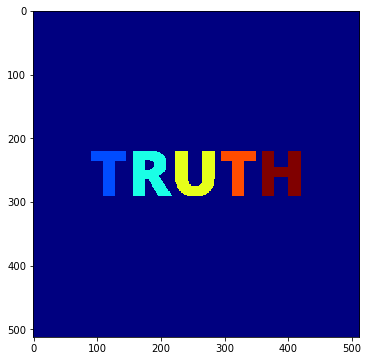

In [5]:
# The following line finds the min and max pixel values
# and their locations on an image.
(minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imLabels)

# Normalize the image so that the min value is 0 and max value is 255.
imLabels = 255 * (imLabels - minVal)/(maxVal-minVal)

# Convert image to 8-bits unsigned type
imLabels = np.uint8(imLabels)

# Apply a color map
imColorMap = cv2.applyColorMap(imLabels, cv2.COLORMAP_JET)
plt.imshow(imColorMap[:,:,::-1])